<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#DDF6A0;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Pneumonia Diagnosis using X-rays 🏥 ☢ 🩺 </h1></center>    

</div>

<p align="center">
  <img width="600" height="300" src="https://www.h-h-c.com/wp-content/uploads/2021/08/Lobar-Pneumonia.png">
</p>

# **About Dataset**

<p align="center">
  <img width="630" height="350" src="https://assets.aboutkidshealth.ca/akhassets/Pneumonia_XRAY_MEDIMG_PHO_EN.png?RenditionID=19">
</p>

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

# **Import Libraries and Download Data**

In [ ]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download paultimothymooney/chest-xray-pneumonia
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# **Preprocessing**

In [ ]:
base_dir = 'chest_xray'

print('Contents of base directory:')
print(os.listdir(base_dir))

print('\nContents of train directory:')
print(os.listdir(f'{base_dir}/train'))

print('\nContents of val directory:')
print(os.listdir(f'{base_dir}/val'))

print('\nContents of test directory:')
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['chest_xray', 'test', '__MACOSX', 'val', 'train']

Contents of train directory:
['PNEUMONIA', 'NORMAL']

Contents of val directory:
['PNEUMONIA', 'NORMAL']

Contents of test directory:
['PNEUMONIA', 'NORMAL']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

#Directory with training NORMAL/PNEUMONIA pictures
train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

#Directory with validation NORMAL/PNEUMONIA pictures
val_NORMAL_dir = os.path.join(val_dir, 'NORMAL')
val_PNEUMONIA_dir = os.path.join(val_dir, 'PNEUMONIA')

#Directory with test NORMAL/PNEUMONIA pictures
test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

In [ ]:
train_NORMAL_fnames = os.listdir(train_NORMAL_dir)
train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)

print(train_NORMAL_fnames[:5])
print(train_PNEUMONIA_fnames[:5])

['IM-0479-0001.jpeg', 'IM-0700-0001.jpeg', 'NORMAL2-IM-1362-0001.jpeg', 'NORMAL2-IM-0977-0001.jpeg', 'NORMAL2-IM-0416-0001.jpeg']
['person475_bacteria_2020.jpeg', 'person1567_virus_2722.jpeg', 'person1695_bacteria_4492.jpeg', 'person1050_bacteria_2984.jpeg', 'person845_virus_1489.jpeg']


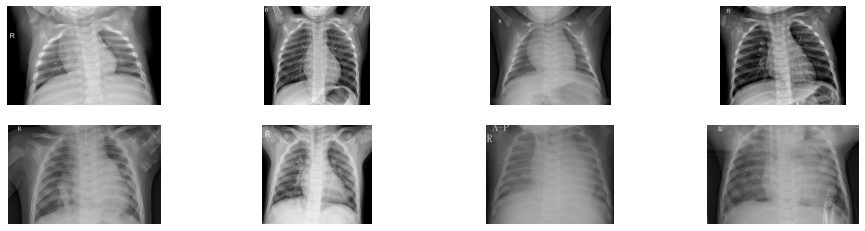

In [ ]:
nrows = 2
ncols = 4

pic_index = 0 #Index for iterating over images

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*2)

pic_index+=4

next_NORMAL_pix = [os.path.join(train_NORMAL_dir, fname) 
                for fname in train_NORMAL_fnames[pic_index-4:pic_index]]

next_PNEUMONIA_pix = [os.path.join(train_PNEUMONIA_dir, fname) 
                for fname in train_PNEUMONIA_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_NORMAL_pix+next_PNEUMONIA_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap='gray')

plt.show();

As you see, by just observing we cannot tell the difference between the affected lungs and the normal ones. Let's see how well our models work to classify the x-rays.

In [ ]:
print('total training NORMAL images :', len(os.listdir(train_NORMAL_dir)))
print('total training PNEUMONIA images :', len(os.listdir(train_PNEUMONIA_dir)))

print('total validation NORMAL images :', len(os.listdir(val_NORMAL_dir)))
print('total validation PNEUMONIA images :', len(os.listdir(val_PNEUMONIA_dir)))

print('total test NORMAL images :', len(os.listdir(test_NORMAL_dir)))
print('total test PNEUMONIA images :', len(os.listdir(test_PNEUMONIA_dir)))

total training NORMAL images : 1341
total training PNEUMONIA images : 3875
total validation NORMAL images : 8
total validation PNEUMONIA images : 8
total test NORMAL images : 234
total test PNEUMONIA images : 390


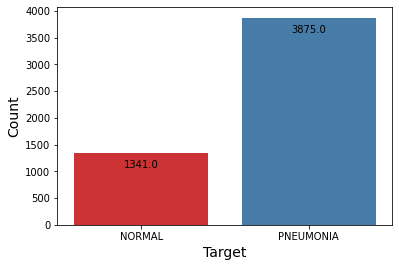

In [ ]:
ax = sns.barplot(x = ['NORMAL', 'PNEUMONIA'], y = [len(os.listdir(train_NORMAL_dir)), len(os.listdir(train_PNEUMONIA_dir))]
            , palette = 'Set1')
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel('Target', size=14)
plt.ylabel('Count', size=14);

our datset is imbalanced. About 75 $\%$ of the train data has PNEUMONIA label.

For the data augmentation, we:

* Randomly rotate some training images by 30 degrees
* Randomly Zoom by 20% some training images
* Randomly shift images horizontally by 10% of the width
* Randomly shift images vertically by 10% of the height
* Randomly flip images horizontally

All images will be rescaled by 1./255 and also I use greyscale images (1 channel)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range = 0.2, # Randomly zoom image 
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip = True,  # randomly flip images
                                   vertical_flip=False)
val_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
#Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    class_mode = 'binary',
                                                    target_size = (299, 299),
                                                    color_mode='grayscale')     
# --------------------
#Flow validation images in batches of 20 using val_datagen generator
# --------------------
val_generator =  val_datagen.flow_from_directory(val_dir,
                                                 batch_size = 8,
                                                 class_mode = 'binary',
                                                 target_size = (299, 299),
                                                 color_mode='grayscale')
# --------------------
#Flow test images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size = 64,
                                                   class_mode = 'binary',
                                                   target_size = (299, 299),
                                                   color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# **Model 1: CNN**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(299, 299, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 297, 297, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                        

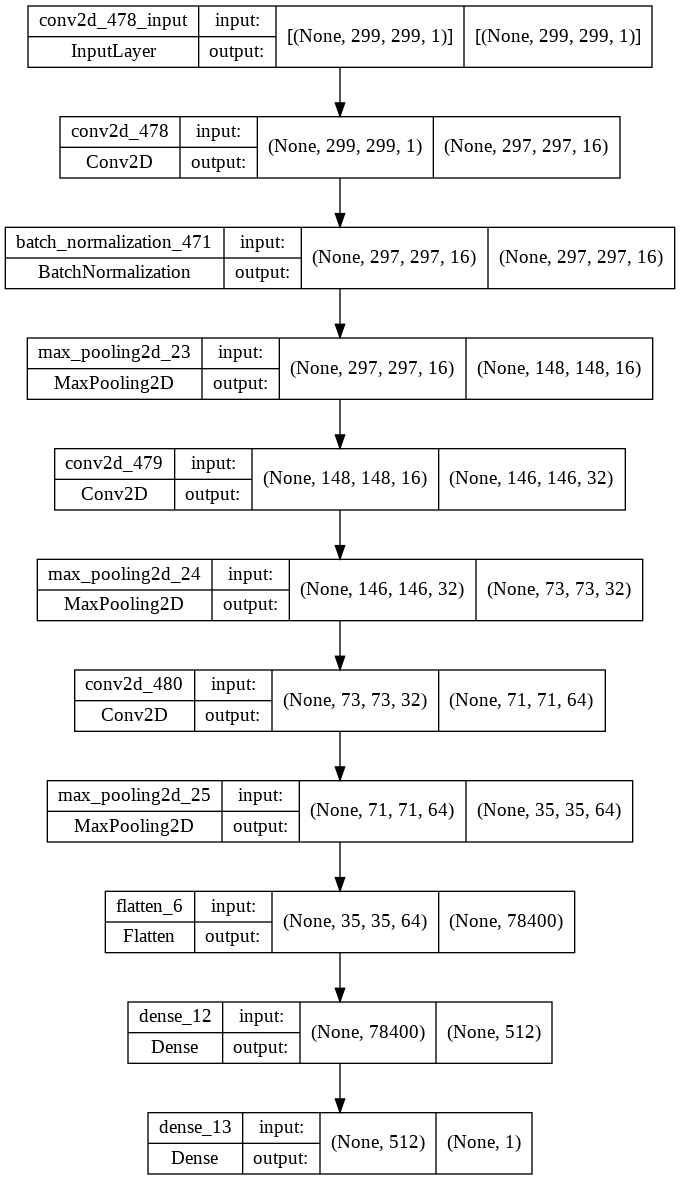

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision1 = precision(y_true, y_pred)
    recall1 = recall(y_true, y_pred)
    return 2*((precision1*recall1)/(precision1+recall1+K.epsilon()))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-8), loss = 'binary_crossentropy', 
              metrics = ['accuracy', f1, precision, recall])

Let's find the optimal learning for the CNN.

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 12.5))

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 40,
                    epochs = 50,
                    callbacks = [lr_schedule],
                    verbose = 1)

Epoch 1/50
40/40 [==============================] - 88s 2s/step - loss: 0.5545 - accuracy: 0.7427 - f1: 0.8518 - precision: 0.7428 - recall: 1.0000 - lr: 1.0000e-06
Epoch 2/50
40/40 [==============================] - 72s 2s/step - loss: 0.4752 - accuracy: 0.7588 - f1: 0.8604 - precision: 0.7567 - recall: 0.9984 - lr: 1.2023e-06
Epoch 3/50
40/40 [==============================] - 72s 2s/step - loss: 0.4050 - accuracy: 0.8259 - f1: 0.8941 - precision: 0.8178 - recall: 0.9883 - lr: 1.4454e-06
Epoch 4/50
40/40 [==============================] - 72s 2s/step - loss: 0.3539 - accuracy: 0.8638 - f1: 0.9136 - precision: 0.8632 - recall: 0.9726 - lr: 1.7378e-06
Epoch 5/50
40/40 [==============================] - 72s 2s/step - loss: 0.3112 - accuracy: 0.8925 - f1: 0.9301 - precision: 0.9016 - recall: 0.9616 - lr: 2.0893e-06
Epoch 6/50
40/40 [==============================] - 71s 2s/step - loss: 0.2778 - accuracy: 0.9057 - f1: 0.9378 - precision: 0.9196 - recall: 0.9580 - lr: 2.5119e-06
Epoch 7/50

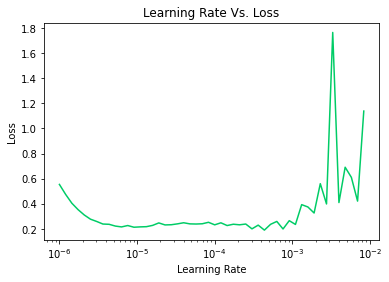

In [ ]:
lrs = 1e-6 * (10 ** (np.arange(50) / 12.5))
plt.semilogx(lrs, history.history['loss'], color = '#00cc66')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs. Loss');

It seems that $10^{-5}$ will be a good choice. However, due to limited resources I will use a higher learning rate to converge faster. If you use $10^-5$ for learning rate with the right amount of epoch, you may get a better result.

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss = 'binary_crossentropy', 
              metrics = ['accuracy', f1, precision, recall, tf.keras.metrics.AUC(), tf.keras.metrics.TruePositives(), 
                         tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 40,
                    epochs = 30,
                    validation_data = val_generator,
                    validation_steps = 2,
                    verbose = 1)

Epoch 1/30
40/40 [==============================] - 88s 2s/step - loss: 4.2944 - accuracy: 0.7661 - f1: 0.8111 - precision: 0.8298 - recall: 0.8288 - auc: 0.7557 - true_positives: 3130.0000 - true_negatives: 768.0000 - false_positives: 540.0000 - false_negatives: 650.0000 - val_loss: 0.6807 - val_accuracy: 0.6250 - val_f1: 0.6970 - val_precision: 0.5857 - val_recall: 0.8750 - val_auc: 0.7578 - val_true_positives: 7.0000 - val_true_negatives: 3.0000 - val_false_positives: 5.0000 - val_false_negatives: 1.0000
Epoch 2/30
40/40 [==============================] - 70s 2s/step - loss: 0.3988 - accuracy: 0.8276 - f1: 0.8740 - precision: 0.9132 - recall: 0.8686 - auc: 0.8765 - true_positives: 3287.0000 - true_negatives: 924.0000 - false_positives: 383.0000 - false_negatives: 494.0000 - val_loss: 0.6783 - val_accuracy: 0.5000 - val_f1: 0.6667 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.8594 - val_true_positives: 8.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 8.0000 

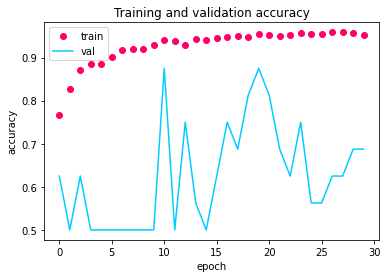

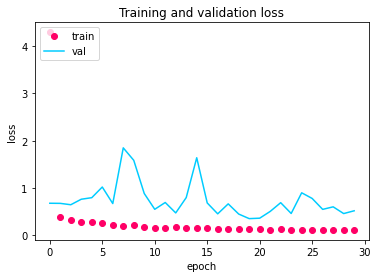

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc, 'bo', color = '#ff0066')
plt.plot  (epochs, val_acc, color = '#00ccff')
plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss, 'bo', color = '#ff0066')
plt.plot  (epochs, val_loss, color = '#00ccff')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title ('Training and validation loss');

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 468ms/step - loss: 0.3034 - accuracy: 0.9087 - f1: 0.9295 - precision: 0.8889 - recall: 0.9749 - auc: 0.9445 - true_positives: 380.0000 - true_negatives: 187.0000 - false_positives: 47.0000 - false_negatives: 10.0000


[0.30340832471847534,
 0.9086538553237915,
 0.9295485615730286,
 0.888942539691925,
 0.9748703241348267,
 0.9444991946220398,
 380.0,
 187.0,
 47.0,
 10.0]

Recall is an important metric especially in healthcare data. Recall literally is how many of the true positives were found, i.e. how many of the correct hits were also found.

$Recall = \frac{TP}{TP+FN}$

In other words, the recall is the measure of our model correctly identifying True Positives. Thus, for all the patients who actually have Pneumonia, recall tells us how many we correctly identified as having a Pneumonia, so $97.5 \%$ recall is very impressive. What if a patient has Pneumonia, but there is no treatment given to him/her because our model predicted so? That is a situation we would like to avoid!

In [ ]:
#model.save('CNN.h5')
#model.save_weights('CNN_weights.h5')

In [ ]:
#tf.keras.backend.clear_session()

**CNN with class weight**

Since we have imbalanced data, we will assign class weights to each label to make sure that the model is not biased to the prevalent label.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(299, 299, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 297, 297, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                        

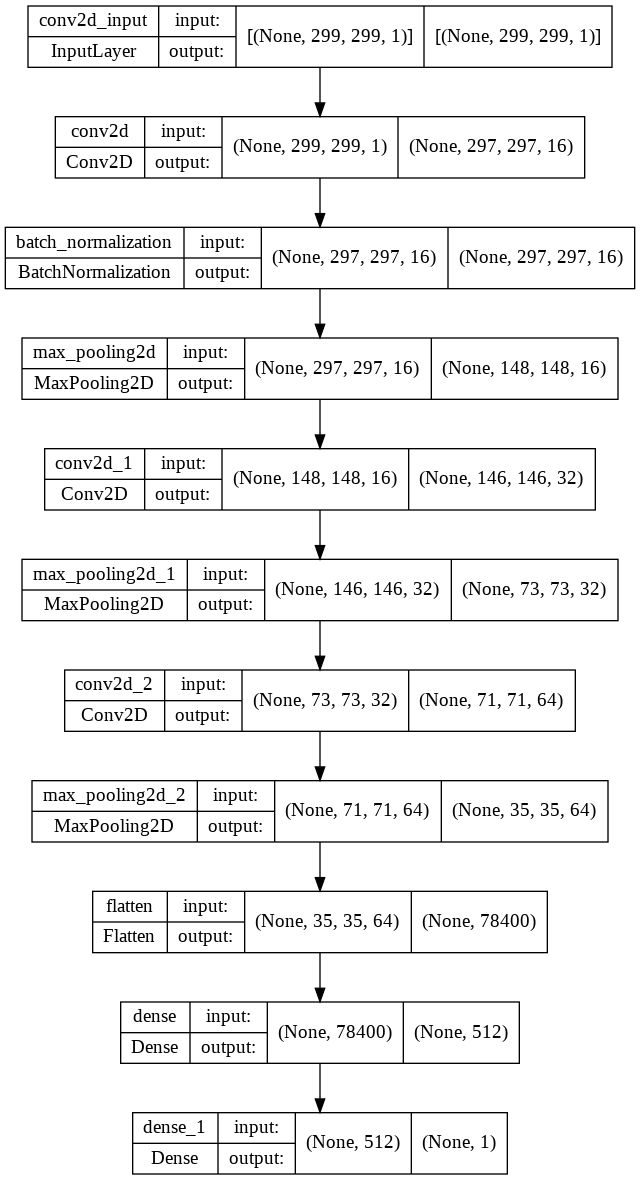

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision1 = precision(y_true, y_pred)
    recall1 = recall(y_true, y_pred)
    return 2*((precision1*recall1)/(precision1+recall1+K.epsilon()))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy', f1, precision, recall])

In [ ]:
weight_0 = (len(os.listdir(train_NORMAL_dir)) + len(os.listdir(train_NORMAL_dir))) / (2 * len(os.listdir(train_NORMAL_dir)))
weight_1 = (len(os.listdir(train_NORMAL_dir)) + len(os.listdir(train_NORMAL_dir))) / (2 * len(os.listdir(train_NORMAL_dir)))
class_weights = {0: weight_0, 1: weight_1}

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 40,
                    epochs = 30,
                    validation_data = val_generator,
                    validation_steps = 2,
                    class_weight = class_weights,
                    verbose = 1)

Epoch 1/30
40/40 [==============================] - 87s 2s/step - loss: 5.0112 - accuracy: 0.7370 - f1: 0.7828 - precision: 0.7785 - recall: 0.8317 - val_loss: 0.6735 - val_accuracy: 0.5625 - val_f1: 0.6970 - val_precision: 0.5357 - val_recall: 1.0000
Epoch 2/30
40/40 [==============================] - 72s 2s/step - loss: 0.3991 - accuracy: 0.8174 - f1: 0.8751 - precision: 0.8935 - recall: 0.8831 - val_loss: 0.6749 - val_accuracy: 0.5625 - val_f1: 0.6846 - val_precision: 0.5268 - val_recall: 1.0000
Epoch 3/30
40/40 [==============================] - 72s 2s/step - loss: 0.3639 - accuracy: 0.8534 - f1: 0.8994 - precision: 0.9185 - recall: 0.8953 - val_loss: 0.6811 - val_accuracy: 0.5625 - val_f1: 0.6846 - val_precision: 0.5268 - val_recall: 1.0000
Epoch 4/30
40/40 [==============================] - 72s 2s/step - loss: 0.3186 - accuracy: 0.8693 - f1: 0.9099 - precision: 0.9237 - recall: 0.9077 - val_loss: 0.6654 - val_accuracy: 0.6250 - val_f1: 0.6838 - val_precision: 0.5714 - val_recall:

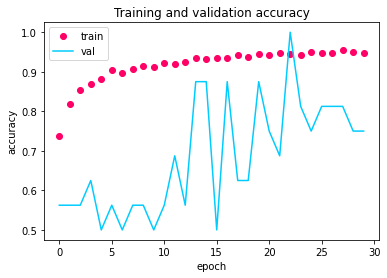

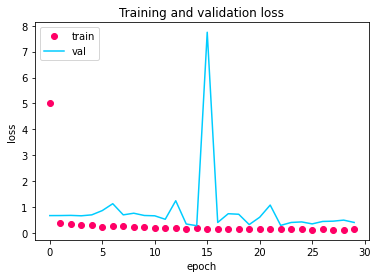

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc, 'bo', color = '#ff0066')
plt.plot  (epochs, val_acc, color = '#00ccff')
plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss, 'bo', color = '#ff0066')
plt.plot  (epochs, val_loss, color = '#00ccff')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title ('Training and validation loss');

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 466ms/step - loss: 0.4130 - accuracy: 0.8702 - f1: 0.9055 - precision: 0.8332 - recall: 0.9919


[0.4129561483860016,
 0.870192289352417,
 0.9054570198059082,
 0.8331562876701355,
 0.9919020533561707]

Recall has been increased ($99.19\%$) when considering class weights but accuracy and precision has been decreased.

In [ ]:
#model.save('CNN.h5')
#model.save_weights('CNN_weights.h5')

In [ ]:
#tf.keras.backend.clear_session()

# **Model 2: Transfer Learning (Inception V3)**

I have used imagenet model **InceptionV3** as my base model for pneumonia better diagnosis.

In [ ]:
#Initialize the base model.
#Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (299, 299, 3), include_top = False)

#Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

<p align="center">
  <img width="850" height="300" src="https://camo.githubusercontent.com/b50c628a87182a67a7d738d9bace531587992223b6b45788d9fb544ae11f31cb/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f323030302f302a746533786b734f725679744d2d423137">
</p>

In [ ]:
model = tf.keras.models.Model(inputs = pre_trained_model.inputs, outputs = pre_trained_model.get_layer('mixed7').output)

input_tensor = Input(shape=(299,299,1))
x = Conv2D(3,(3,3),padding='same')(input_tensor)
x = model(x)
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.1)(x)
out = Dense(1, activation = 'sigmoid')(x)
model = tf.keras.models.Model(inputs = input_tensor, outputs = out)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 299, 299, 1)]     0         
                                                                 
 conv2d_474 (Conv2D)         (None, 299, 299, 3)       30        
                                                                 
 model_5 (Functional)        (None, 17, 17, 768)       8975264   
                                                                 
 flatten_4 (Flatten)         (None, 221952)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               113639936 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513 

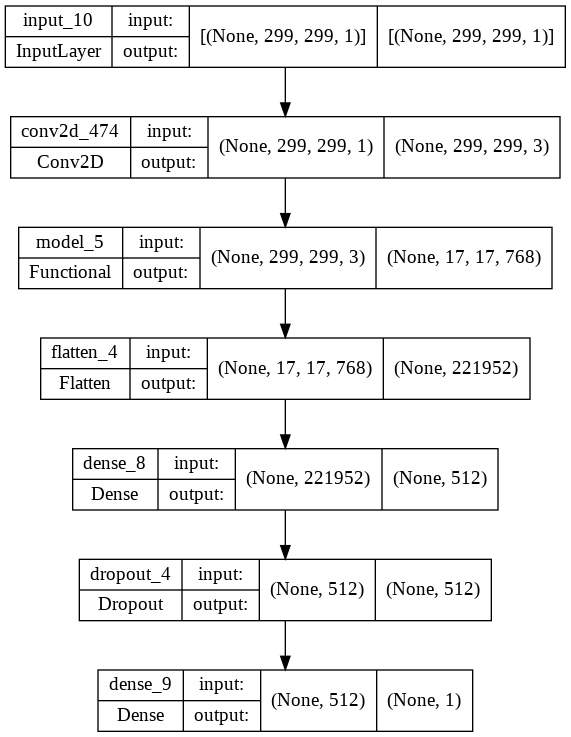

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', 
              metrics = ['accuracy', f1_m, precision_m, recall_m])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 40,
                    epochs = 15,
                    validation_data = val_generator,
                    validation_steps = 2,
                    verbose = 1)

Epoch 1/15
40/40 [==============================] - 114s 2s/step - loss: 0.5196 - accuracy: 0.8479 - f1_m: 0.8852 - precision_m: 0.9154 - recall_m: 0.8884 - val_loss: 0.3633 - val_accuracy: 0.8125 - val_f1_m: 0.8295 - val_precision_m: 0.7167 - val_recall_m: 1.0000
Epoch 2/15
40/40 [==============================] - 85s 2s/step - loss: 0.2143 - accuracy: 0.9100 - f1_m: 0.9380 - precision_m: 0.9482 - recall_m: 0.9340 - val_loss: 0.3978 - val_accuracy: 0.7500 - val_f1_m: 0.7879 - val_precision_m: 0.6667 - val_recall_m: 1.0000
Epoch 3/15
40/40 [==============================] - 85s 2s/step - loss: 0.1777 - accuracy: 0.9261 - f1_m: 0.9497 - precision_m: 0.9580 - recall_m: 0.9456 - val_loss: 0.1713 - val_accuracy: 0.9375 - val_f1_m: 0.9444 - val_precision_m: 1.0000 - val_recall_m: 0.9000
Epoch 4/15
40/40 [==============================] - 85s 2s/step - loss: 0.1718 - accuracy: 0.9306 - f1_m: 0.9530 - precision_m: 0.9603 - recall_m: 0.9494 - val_loss: 0.1476 - val_accuracy: 1.0000 - val_f1_m:

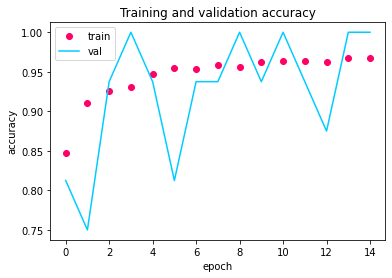

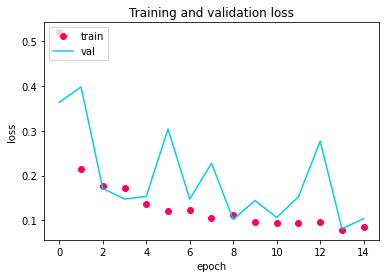

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc, 'bo', color = '#ff0066')
plt.plot  (epochs, val_acc, color = '#00ccff')
plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss, 'bo', color = '#ff0066')
plt.plot  (epochs, val_loss, color = '#00ccff')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title ('Training and validation loss');

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 503ms/step - loss: 0.1669 - accuracy: 0.9439 - f1_m: 0.9558 - precision_m: 0.9340 - recall_m: 0.9796


[0.16689537465572357,
 0.9439102411270142,
 0.955761730670929,
 0.9339842796325684,
 0.9796299934387207]

Recall, precision, and accuracy are higher than the previous models.

In [ ]:
#model.save('Transfer_InceptionV3.h5')
#model.save_weights('Transfer_InceptionV3_weights.h5')

In [ ]:
#tf.keras.backend.clear_session()